# Exercise Session 1: Getting Started with Computer Vision

The goals of this exercise are:
* getting started with Python for image manipulation
* getting familiar with the basic image manipulation functions
* implementing some simple real-world Computer Vision algorithms

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage import measure, color
from os import listdir 

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.cmap'] = 'gray'

## Exercise 1: Image Segmentation

In many vision applications, it is useful to separate out the regions of the image corresponding to objects in which we are interested in the regions of the image that correspond to the background. Thresholding often provides an easy and convenient way to perform this segmentation on the basis of the different intensities or colours in the foreground and background regions of an image.

The input to a thresholding operation is typically a grayscale or colour image. In the simplest implementation, the output is a binary image representing the segmentation. Black pixels correspond to background and white pixels correspond to foreground (or vice versa). Multiple thresholds can be specified, so that a band of intensity values can be set to white while everything else is set to black.

If it is possible to separate out the foreground of an image on the basis of pixel intensity, then the intensity of pixels within foreground objects must be distinctly different from the intensity of pixels within the background. In this case, we expect to see a distinct peak in the histogram corresponding to foreground objects such that thresholds can be chosen to isolate this peak accordingly. If such a peak does not exist, then it is unlikely that simple thresholding will produce a good segmentation.

An example of thresholding the image histogram:
<br/>
<img src="images/threshold.png">


* Read and display the image "wdg.png" using e.g. function ```cv2.imread()```. Convert it from color to greyscale if necessary using e.g. function ```cv2.cvtColor()```. Visualize the results using ```plt.imshow()``` function.</li>

Dimension of original image is: (96, 126, 3)



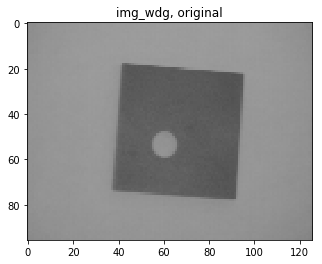

Dimension of grayscale image is: (96, 126)



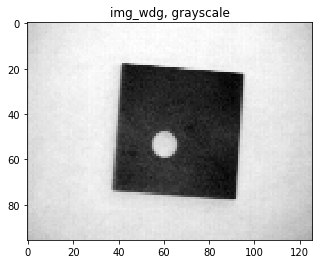

In [2]:
img_wdg = cv2.imread('images/wdg.png')
print("Dimension of original image is: " + str(img_wdg.shape) + "\n")
plt.imshow(img_wdg)
plt.title('img_wdg, original')
plt.show()

img_wdg_gray = cv2.cvtColor(img_wdg, cv2.COLOR_BGR2GRAY)
print("Dimension of grayscale image is: " + str(img_wdg_gray.shape) + "\n")
plt.imshow(img_wdg_gray)
plt.title('img_wdg, grayscale')
plt.show()

* Write a method to threshold a gray scale image by using two threshold values as shown above. The values must satisfy the following conditions:
\begin{align}
Th1 < Th2 
\newline 
Th1 > 0 
\newline 
Th2 < max
\end{align}

In [3]:
def threshold(in_image, th1, th2):
    out_image = in_image.copy()
    out_image[in_image < th1] = 0
    out_image[in_image > th2] = 0
    out_image[(in_image>=th1) & (in_image<=th2)] = 255
    
    return out_image

* Take a look at the pixels intensity histogram using function ```matplotlib.pyplot.hist()``` and choose the best threshold values and segment the image.</li>

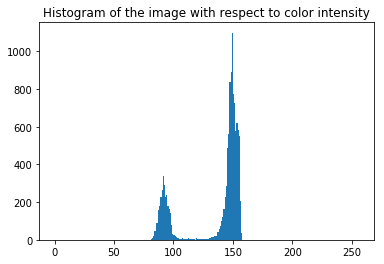

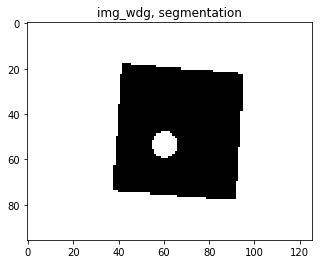

In [4]:
# Use flatten to transform image into a 1D array
# 256 bins with range 0 to 256
plt.hist(img_wdg_gray.flatten(), 256,[0,256])
plt.title('Histogram of the image with respect to color intensity')
plt.show()

# From this histogram, reasonable threshold choices are th1=120 and th2=170
wdg_seg = threshold(img_wdg_gray, 120, 170)
plt.imshow(wdg_seg)
plt.title('img_wdg, segmentation')
plt.show()

* Repeat the same steps for images "brain.png" and "shading.png". What do you notice? What are the drawbacks of this segmentation method? </li>

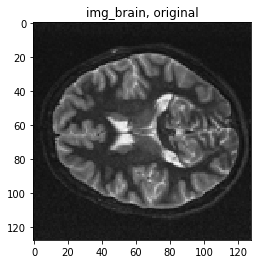

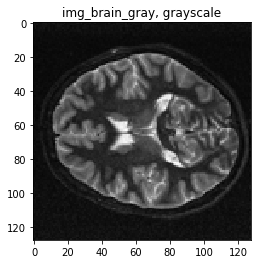

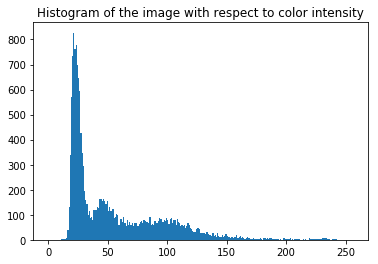

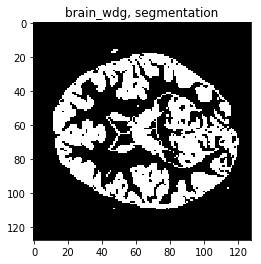

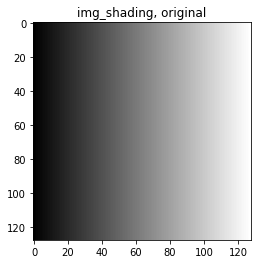

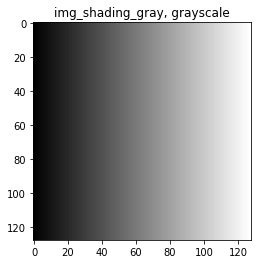

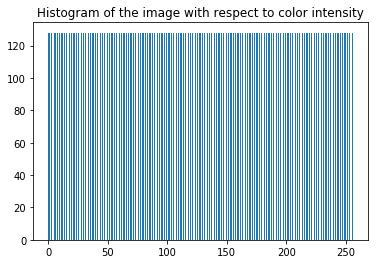

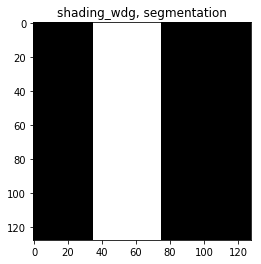

In [5]:
# Brain image 
img_brain = cv2.imread('images/brain.png')
img_brain_gray = cv2.cvtColor(img_brain, cv2.COLOR_BGR2GRAY)

plt.imshow(img_brain)
plt.title('img_brain, original')
plt.show()

plt.imshow(img_brain_gray)
plt.title('img_brain_gray, grayscale')
plt.show()

plt.hist(img_brain_gray.flatten(), 256,[0,256])
plt.title('Histogram of the image with respect to color intensity')
plt.show()

# From this histogram, reasonable threshold choices are th1=70 and th2=150
brain_seg = threshold(img_brain_gray, 70, 150)
plt.imshow(brain_seg)
plt.title('brain_wdg, segmentation')
plt.show()

# Shading image
img_shading = cv2.imread('images/shading.png')
img_shading_gray = cv2.cvtColor(img_shading, cv2.COLOR_BGR2GRAY)

plt.imshow(img_shading)
plt.title('img_shading, original')
plt.show()

plt.imshow(img_shading_gray)
plt.title('img_shading_gray, grayscale')
plt.show()

plt.hist(img_shading_gray.flatten(), 256,[0,256])
plt.title('Histogram of the image with respect to color intensity')
plt.show()

# From this histogram, there are no reasonable threshold choices but anyhow let's try with th1=70 and th2=150
shading_seg = threshold(img_shading_gray, 70, 150)
plt.imshow(shading_seg)
plt.title('shading_wdg, segmentation')
plt.show()

## Exercise 2: Background Substraction

Background subtraction is an important preprocessing step of many algorithms, e.g. object detection. In the following exercises we will try to subtract the scene background using multiple images.

### 2.1 Extracting a moving object

* Load the "street1.tiff" and the "street2.tiff" images. Visualize them.

The type variable of each pixel is: <class 'numpy.uint8'>

The dimension of the image is: (171, 95)



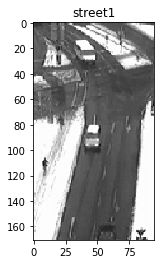

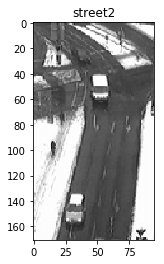

In [6]:
# second argument to directly read the image as a grayscale
street1 =  cv2.imread('images/street1.tiff', cv2.IMREAD_GRAYSCALE)
street2 =  cv2.imread('images/street2.tiff', cv2.IMREAD_GRAYSCALE)
print("The type variable of each pixel is: " + str(type(street1[0][0]))+ "\n")
print("The dimension of the image is: " + str(np.shape(street1)) + "\n")

plt.imshow(street1)
plt.title('street1')
plt.show()

plt.imshow(street2)
plt.title('street2')
plt.show()

* Transform the 8-bit images into float images. You can check the type of a variable using ```type()``` function (You need to check the type of variable holding a pixel value ```type(image_1[0,0])```. If you use ```type(image_1)``` it will tell you the type of the variable that hold the image instead of the type of the variable that holds the pixel values). To perform the type casting you can use ```np.float32()``` function. 

In [7]:
street1 = np.float32(street1)
street2 = np.float32(street2)
print("The new type variable of each pixel is: " + str(type(street1[0][0]))+ "\n")

The new type variable of each pixel is: <class 'numpy.float32'>



* Subtract the second image from the first one using basic matrix arithmetic operations. Visualize the results. Why was it important to do the casting before subtracting the images? 

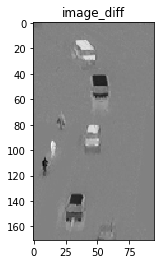

In [8]:
# add your code here. Assign the difference to 'image_diff'
image_diff = street1-street2
plt.imshow(image_diff)  
plt.title('image_diff')
plt.show()

### 2.2 Building a background model
For this exercise, you are given a sequence of images that contains pedestrians and we wish to segment with a background subtraction algorithm.

* Load and create a stack of images from the images inside ```images/sequence1```. Build a "background model" by averaging out the set of given images. Detect pedestrians
 subtracting the background model from the original images and applying the right threshold.

The type of each pixel is: uint8
The dimension of a single image is: (576, 720)
We declare a variable of size: (30, 576, 720) to stock all images
After the mean operation type is: float64, thus requires a conversion to the original format


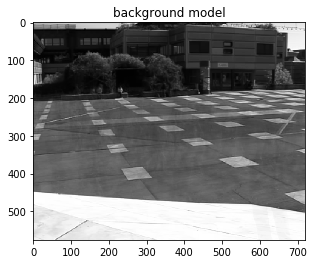

In [9]:
# 'sq_of_images' holds the list of image names. Create an image stack using them.
sq_of_images = listdir('images/sequence1/') 
sq_of_images = [img for img in sq_of_images if img.endswith(".jpg")]


image1 = cv2.imread('images/sequence1/' + str(sq_of_images[0]), cv2.IMREAD_GRAYSCALE)
print("The type of each pixel is: " + str(image1.dtype))
print("The dimension of a single image is: " +str(np.shape(image1)))

rows = np.shape(image1)[0]
cols = np.shape(image1)[1]
n = np.size(sq_of_images)

stack = np.zeros((n, rows, cols))
print("We declare a variable of size: " + str(np.shape(stack)) + " to stock all images")

i = 0
for img in sq_of_images:
    #sum_image += cv2.imread('images/sequence1/' + str(img), cv2.IMREAD_GRAYSCALE)
    img_tmp = cv2.imread('images/sequence1/' + str(img), cv2.IMREAD_GRAYSCALE)
    stack[i,:,:] += img_tmp
    i += 1
    


img_mean = (np.mean(stack, axis=0))

print("After the mean operation type is: " + str(img_mean.dtype) + ", thus requires a conversion to the original format")
img_mean = np.uint8(img_mean)

plt.imshow(img_mean)
plt.title('background model')
plt.show()


    
# Compute the mean image using the stack and assign it to 'mean_image'.



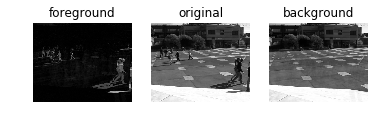

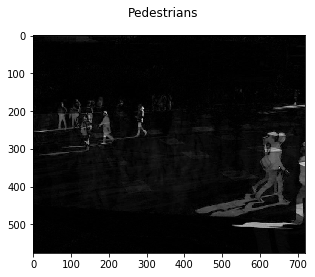

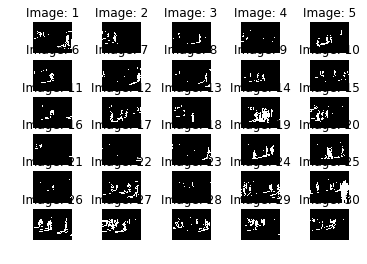

In [10]:
stack = np.float32(stack)
img_mean = np.float32(img_mean)
foreground1 = abs(stack[0,:,:] - img_mean)
plt.figure()
plt.subplot(1,3,1)
plt.title('foreground')
plt.axis('off')
plt.imshow(foreground1)
plt.subplot(1,3,2)
plt.title('original')
plt.axis('off')
plt.imshow(image1)
plt.subplot(1,3,3)
plt.title('background')
plt.axis('off')
plt.imshow(img_mean)
plt.show()

T = 30
plt.figure(2)
plt.suptitle('Pedestrians')

plt.imshow(foreground1)
plt.show()
# First convert the mean image to grayscale.
# When subtracting, each image must also be converted to grayscale.


for i in range(n):
    # Compute the foreground image here. Assign it to 'foreground' variable.
    diff = abs(stack[i,:,:] - img_mean)
    # True (i.e white) if greater than threshold, False (i.e black) otherwise 
    foreground =  diff > T
    plt.subplot(6,5,i+1)
    plt.imshow(foreground)
    plt.axis('off')
    plt.title('Image: ' + str(i+1)) 

* Create a more sophisticated background model, where each pixel can be modeled with a Gaussian distribution. We can classify a pixel as background if its current intensity ($I_t$) lies within some confidence interval of its distribution’s mean ($\mu(t)$):


\begin{align}
\frac{\mid{(I_t - \mu_t)}\mid}{\sigma_t} > T \rightarrow Foreground 
\newline
\frac{\mid{(I_t - \mu_t)}\mid}{\sigma_t} < T \rightarrow Background 
\end{align}

$\sigma_t$ is the standard deviation of the pixel $t$ in the background model. $T$ is the threshold.

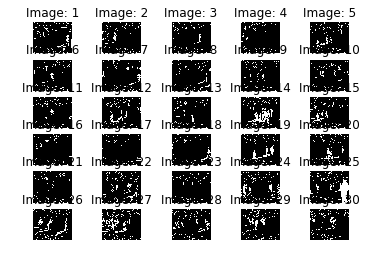

In [11]:
# Add your code here. Before computing the model convert the images into gray-scale images. 
std = np.std(stack, axis=0)
# If deviation is greater than 2 std then pixel is foreground
T = 2 
# Ensure no division by zero
tol = 1e-3
std[std <= tol] = tol
for i in range(n):
    # Compute the foreground image here. Assign it to 'foreground' variable.
    t = np.true_divide(abs(stack[i,:,:] - img_mean), std)
    # True (i.e white) if greater than threshold, False (i.e black) otherwise 
    foreground =  t > T
    plt.subplot(6,5,i+1)
    plt.imshow(foreground)
    plt.axis('off')
    plt.title('Image: ' + str(i+1)) 
    

What difference do you notice between the two approaches? How does changing
the threshold affect them?

## Exercise 3: Connected Components

Segmentation can be also done for colour images. It is also often a first step for the further analysis e.g. measuring properties of the object. Here our goal is to count the number of apples in the image below.



* Read and display"apples.jpg" image.

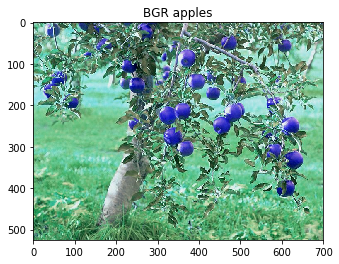

(525, 700, 3)


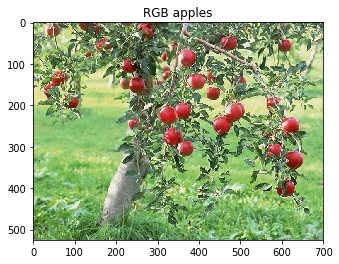

In [12]:
#add your code here
apples_img = cv2.imread('images/apples.jpg')
plt.imshow(apples_img)
plt.title('BGR apples')
plt.show()
# We can see that the blue and red colors are inverted
print(np.shape(apples_img))
B, G, R = cv2.split(apples_img)
apples_img = cv2.merge([R,G,B])
plt.imshow(apples_img)
plt.title('RGB apples')
plt.show()

* Check the size of the image. Compared to the previous images it should have an additional dimension corresponding to three colour channels: red, green and blue. Visualize those 3 channels separately.

Text(0.5, 1.0, 'Blue channel')

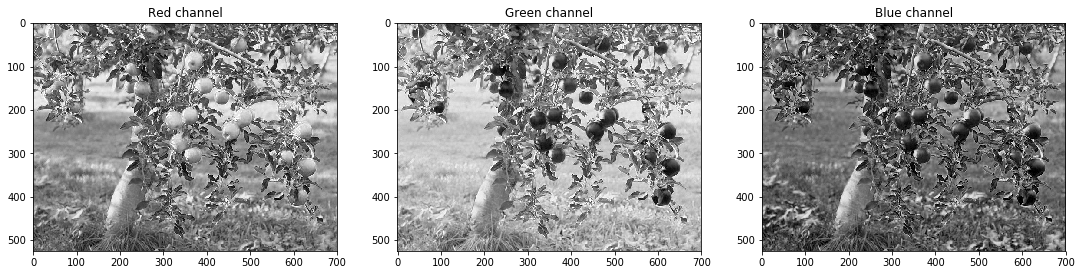

In [13]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)
# add your code for visualizing three channels
axes[0].imshow(apples_img[:,:,0])
axes[0].set_title('Red channel')
axes[1].imshow(apples_img[:,:,1])
axes[1].set_title('Green channel')
axes[2].imshow(apples_img[:,:,2])
axes[2].set_title('Blue channel')

* Try to obtain a binary image such that binary image == 1 for pixels representing apples and 0 otherwise. Which channel(s) would you use for that?

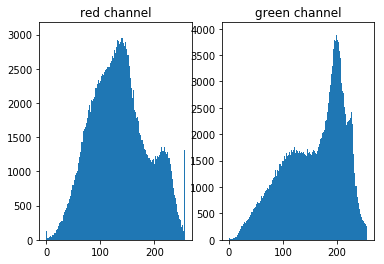

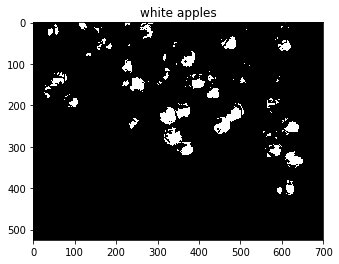

In [14]:
bin_img = np.zeros(apples_img.shape[0:2])
#add your code for thresholding the image
apples_img_G = apples_img[:,:,1]
apples_img_R = apples_img[:,:,0]
plt.figure
plt.subplot(1,2,1)
plt.hist(apples_img_R.flatten(), 256,[0,256])
plt.title('red channel')
plt.subplot(1,2,2)
plt.hist(apples_img_G.flatten(), 256,[0,256])
plt.title('green channel')
plt.show()
# Potential thresholds could be th1=240 and th2=255
th1 = 100
th2 = 80
bin_img[(apples_img_R >= th1) & (apples_img_G <= th2)] = 255

plt.imshow(bin_img)
plt.title('white apples')
plt.show()

* Count the number of connected components in your binary image (here corresponding to apples). For this, you can use function ```measure.label()```. Its output is an array of the same size as input binary image, with each pixel assigned to a different connected component (ID). Visualize the image with detected connected components.

In [15]:
#add your code to find connected components
labels = measure.label(bin_img)
print(sum(labels[labels == 3]))

303


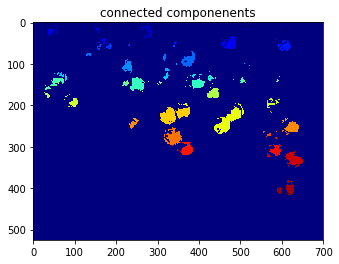

In [16]:
plt.imshow(labels,cmap="jet")
plt.title("connected componenents")
plt.show()

* Simple thresholding sometimes leads to detecting also noise in the background that is detected as seperate connected components. Try to suppress the noise by removing all connected components smaller than a user-defined threshold.

In [17]:
def remove_noise(label_img,threshold):

    label_img_new = np.copy(label_img)
    n_labels = np.max(label_img)
    
    for i in range(n_labels):
        count = sum(label_img[label_img == i])
        if(count < threshold):
            label_img_new[label_img == i] = 0
            
    return label_img_new

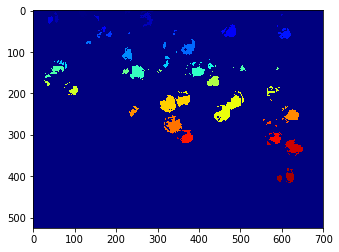

In [18]:
labels_new = remove_noise(labels,100)
plt.imshow(labels_new,cmap="jet")